
# 1. SISTEMA DIFUSO: SATISFACCIÓN DEL CLIENTE 
**Objetivo:** Diseñar un sistema de lógica difusa para estimar la satisfacción de un cliente en función de: 
- Calidad del servicio (0 a 10) 
- Tiempo de espera (0 a 30 minutos) Para ello vas a seguir los siguientes pasos: Paso 1: Definir variables y funciones de pertenencia.

### Paso 1: Definir variables y funciones de pertenencia

**1 Calidad del servicio (0 a 10)** 
- **calidad_baja:** triangular. Es máxima en el valor 0 y va disminuyendo hasta 5. Tiene forma de triángulo que empieza en 0, llega a su punto más alto en 0 y baja a 0 en 5. 
- **calidad_media:** triangular. Es máxima en el valor 5. Aumenta desde 3, alcanza su punto más alto en 5 y vuelve a 0 en 7. Tiene forma de triángulo simétrico centrado en 5. 
- **calidad_alta:** triangular. Comienza en 5, sube hasta su máximo en 10 y se mantiene ahí. Es un triángulo invertido respecto a “baja”, con punto máximo en 10 y base desde 5 a 10.

**2 ️Tiempo de espera (0 a 30s)** 
- **espera_corta:** trapezoidal. Es totalmente alta entre 0 y 5, y empieza a bajar suavemente entre 5 y 10. Tiene forma de trapecio con base superior plana entre 0 y 5. 
- **espera_media:** trapezoidal. Comienza a subir desde 8, se mantiene al máximo entre 12 y 18, y baja hasta 22. Tiene una forma de trapecio centrado en 15. 
- **espera_larga:** trapezoidal. Comienza a subir a partir de 20, se mantiene al máximo entre 25 y 30. Es plana arriba desde 25 hasta 30. 

**3 ️Satisfacción (0 a 10)**
- **satis_baja:** gaussiana. Tiene forma de campana centrada en 2. Se dispersa suavemente por los lados (empieza a notarse a partir de 0 y desaparece hacia 5). 
- **satis_media:** gaussiana. Tiene forma de campana centrada en 5. Es simétrica y cubre aproximadamente desde 3 hasta 7. 
- **satis_alta:** gaussiana. Es una campana centrada en 8. Cubre la zona entre 6 y 10, disminuyendo hacia los lados. 

### Paso 2: Entrada del sistema y fuzzificación de variables  

### Paso 3: Reglas difusas. Las reglas serán las siguientes: 

**Regla 1:** si la calidad de servicio es ALTA y el tiempo de espera es CORTO, entonces la satisfacción del cliente es BAJA

**Regla 2:** si la calidad de servicio es BAJA y el tiempo de espera es LARGO, entonces la satisfacción del cliente es BAJA

**Regla 3:** si la calidad de servicio es MEDIA y el tiempo de espera es MEDIO, entonces la satisfacción del cliente es MEDIA

## Paso 4: Aplicar las reglas al conjunto de salida

**Deberás aplicar tu sistema difuso a las entradas siguientes y obtener los siguientes resultados:** 
    
- input_calidad = 3, input_espera = 25 → resultado bajo (≈ 1.3) 
- input_calidad = 9, input_espera = 2 → resultado alto (≈ 8.9) 
- input_calidad = 6, input_espera = 12 → resultado medio (≈ 5.5) 

Explica en cada uno de estos casos que reglas se están activando y cuanto lo están haciendo para explicar los resultados de satisfacción que obtienes. 

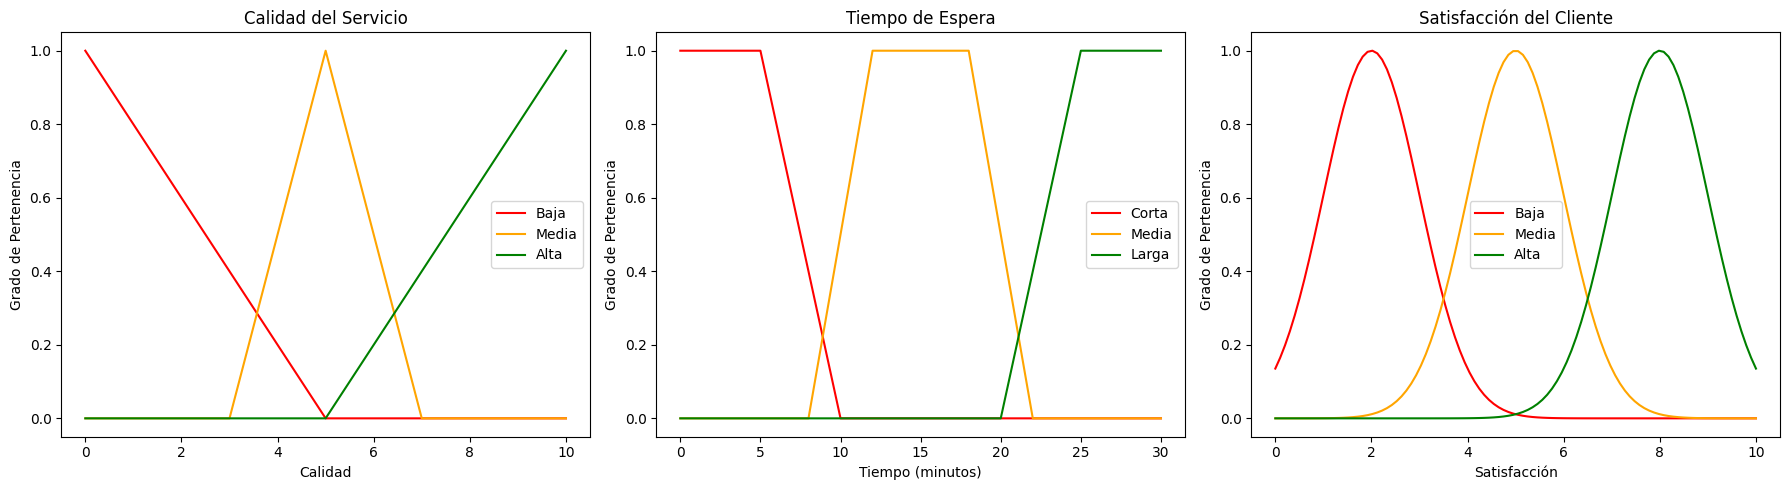


🔍CALIDAD BAJA 3 Y ESPERA LARGA 25: 
Grados de pertenecia CALIDAD: ALTA 0.0 MEDIA 0.0  BAJA 0.4
Grados de pertenecia ESPERA: LARGA 1.0 MEDIA 0.0  CORTA 0.0
Activación Regla 1 SATIS ALTA (calidad alta y espera corta): 0.00
Activación Regla 2 SATIS BAJA (calidad baja y espera larga): 0.40
Activación Regla 3 SATIS MEDIA (calidad media y espera media): 0.00
Resultado calculado: 2.09263
Resultado defuzzificado: 2.09289



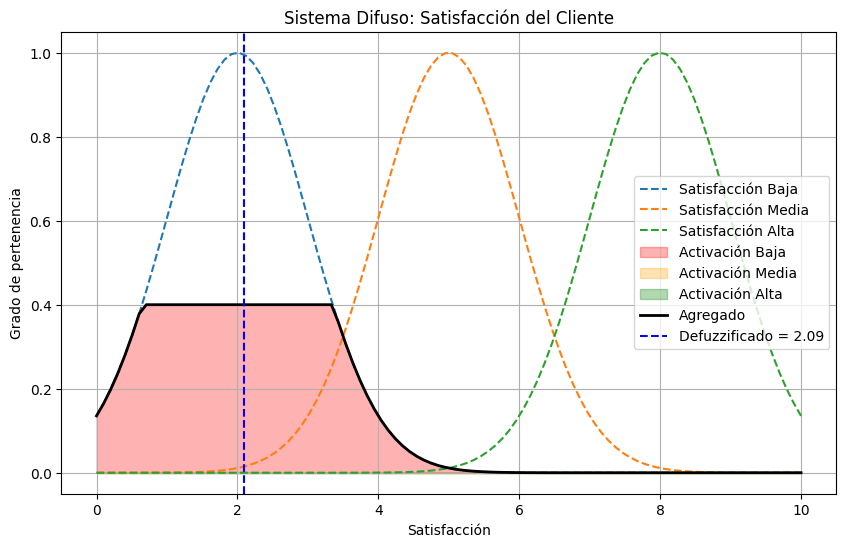


🔍CALIDAD ALTA 9 Y ESPERA BAJA 2: 
Grados de pertenecia CALIDAD: ALTA 0.8 MEDIA 0.0  BAJA 0.0
Grados de pertenecia ESPERA: LARGA 0.0 MEDIA 0.0  CORTA 1.0
Activación Regla 1 SATIS ALTA (calidad alta y espera corta): 0.80
Activación Regla 2 SATIS BAJA (calidad baja y espera larga): 0.00
Activación Regla 3 SATIS MEDIA (calidad media y espera media): 0.00
Resultado calculado: 7.94029
Resultado defuzzificado: 7.94034



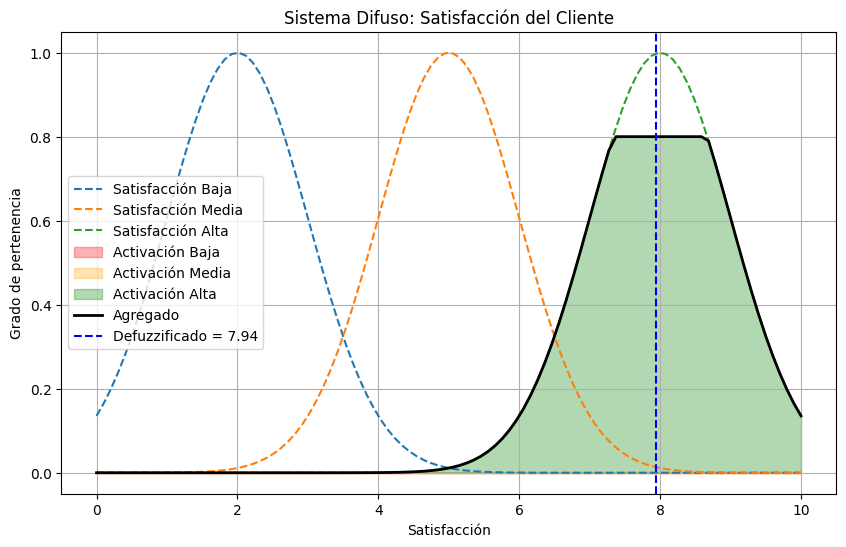


🔍CALIDAD MEDIA 6 Y ESPERA MEDIA 12: 
Grados de pertenecia CALIDAD: ALTA 0.2 MEDIA 0.5  BAJA 0.0
Grados de pertenecia ESPERA: LARGA 0.0 MEDIA 1.0  CORTA 0.0
Activación Regla 1 SATIS ALTA (calidad alta y espera corta): 0.00
Activación Regla 2 SATIS BAJA (calidad baja y espera larga): 0.00
Activación Regla 3 SATIS MEDIA (calidad media y espera media): 0.50
Resultado calculado: 5.00000
Resultado defuzzificado: 5.00000



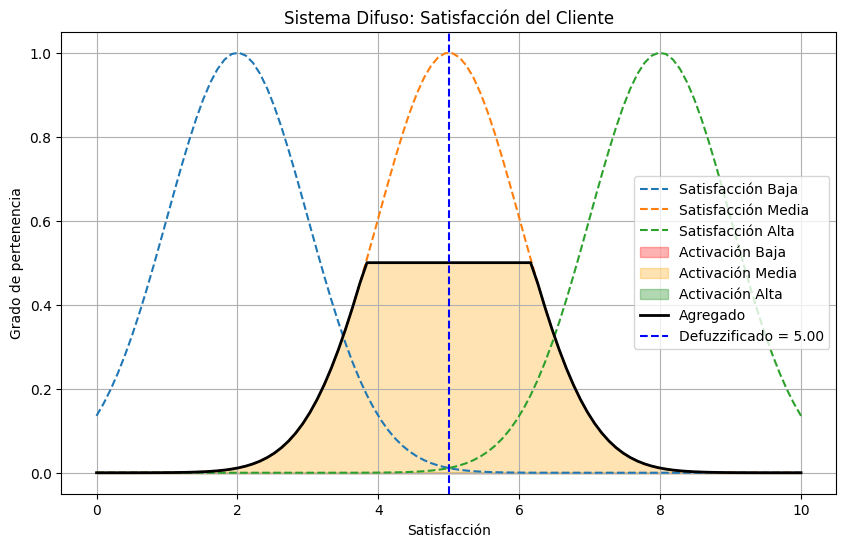

In [1]:
# Importar NumPy para manejo de arrays numéricos
import numpy as np
# Importar el módulo principal de lógica difusa de scikit-fuzzy
import skfuzzy as fuzz
# Importar el submódulo de control difuso
from skfuzzy import control as ctrl
# Importar Matplotlib para visualizar las funciones de membresía
import matplotlib.pyplot as plt


# Paso 1: Definir los rangos de valores
calidad = ctrl.Antecedent(np.arange(0, 11, 1), 'calidad')
espera = ctrl.Antecedent(np.arange(0, 31, 1), 'espera')
satisfaccion = ctrl.Consequent(np.linspace(0, 10, 100), 'satisfaccion')

# 1. Calidad del servicio
calidad_baja = fuzz.trimf(calidad.universe, [0, 0, 5])
calidad_media = fuzz.trimf(calidad.universe, [3, 5, 7])
calidad_alta = fuzz.trimf(calidad.universe, [5, 10, 10])
calidad['baja'] = fuzz.trimf(calidad.universe, [0, 0, 5])
calidad['media'] = fuzz.trimf(calidad.universe, [3, 5, 7])
calidad['alta'] = fuzz.trimf(calidad.universe, [5, 10, 10])

# 2. Tiempo de espera
espera_corta = fuzz.trapmf(espera.universe, [0, 0, 5, 10])
espera_media = fuzz.trapmf(espera.universe, [8, 12, 18, 22])
espera_larga = fuzz.trapmf(espera.universe, [20, 25, 30, 30])
espera['corta']= fuzz.trapmf(espera.universe, [0, 0, 5, 10])
espera['media']= fuzz.trapmf(espera.universe, [8, 12, 18, 22])
espera['larga'] = fuzz.trapmf(espera.universe, [20, 25, 30, 30])

# 3. Satisfacción
satis_baja = fuzz.gaussmf(satisfaccion.universe, 2, 1)  # gaussiana centrada en 2
satis_media = fuzz.gaussmf(satisfaccion.universe, 5, 1)  # gaussiana centrada en 5
satis_alta = fuzz.gaussmf(satisfaccion.universe, 8, 1)  # gaussiana centrada en 8
satisfaccion['baja'] = fuzz.gaussmf(satisfaccion.universe, 2, 1)  # gaussiana centrada en 2
satisfaccion['media'] = fuzz.gaussmf(satisfaccion.universe, 5, 1)  # gaussiana centrada en 5
satisfaccion['alta'] = fuzz.gaussmf(satisfaccion.universe, 8, 1)  # gaussiana centrada en 8

# Visualización de las funciones de membresía para cada variable
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Calidad del servicio
ax1.plot(calidad.universe, calidad_baja, label="Baja", color='red')
ax1.plot(calidad.universe, calidad_media, label="Media", color='orange')
ax1.plot(calidad.universe, calidad_alta, label="Alta", color='green')
ax1.set_title("Calidad del Servicio")
ax1.set_xlabel("Calidad")
ax1.set_ylabel("Grado de Pertenencia")
ax1.legend()

# Tiempo de espera
ax2.plot(espera.universe, espera_corta, label="Corta", color='red')
ax2.plot(espera.universe, espera_media, label="Media", color='orange')
ax2.plot(espera.universe, espera_larga, label="Larga", color='green')
ax2.set_title("Tiempo de Espera")
ax2.set_xlabel("Tiempo (minutos)")
ax2.set_ylabel("Grado de Pertenencia")
ax2.legend()

# Satisfacción
ax3.plot(satisfaccion.universe, satis_baja, label="Baja", color='red')
ax3.plot(satisfaccion.universe, satis_media, label="Media", color='orange')
ax3.plot(satisfaccion.universe, satis_alta, label="Alta", color='green')
ax3.set_title("Satisfacción del Cliente")
ax3.set_xlabel("Satisfacción")
ax3.set_ylabel("Grado de Pertenencia")
ax3.legend()

plt.tight_layout()
plt.show()


# Reglas difusas
regla1 = ctrl.Rule(calidad['alta'] & espera['corta'] , satisfaccion['alta'])
regla2 = ctrl.Rule(calidad['baja'] & espera['larga'] , satisfaccion['baja'])
regla3 = ctrl.Rule(calidad['media'] & espera['media'] , satisfaccion['media'])

# --- SISTEMA DIFUSO ---
sistema_ctrl = ctrl.ControlSystem([regla1, regla2, regla3])
sistema = ctrl.ControlSystemSimulation(sistema_ctrl)

# --- ENTRADAS ---
#*****************************************************************************
#Calidad 3 BAJA , Espera 25 ALTA, SATIFACCION BAJA --> REGLA 1
input_calidad = 3
input_espera = 25
sistema.input['calidad'] =  input_calidad
sistema.input['espera'] = input_espera
sistema.compute()
output = sistema.output['satisfaccion'] 

# --- INTERPOLACIÓN REAL DE GRADOS DE PERTENENCIA ---
cal_baja = fuzz.interp_membership(calidad.universe, calidad['baja'].mf, input_calidad)
cal_media = fuzz.interp_membership(calidad.universe, calidad['media'].mf, input_calidad)
cal_alta = fuzz.interp_membership(calidad.universe, calidad['alta'].mf, input_calidad)
esp_corta = fuzz.interp_membership(espera.universe, espera['corta'].mf, input_espera)
esp_media = fuzz.interp_membership(espera.universe, espera['media'].mf, input_espera)
esp_larga = fuzz.interp_membership(espera.universe, espera['larga'].mf, input_espera)

# --- ACTIVACIONES DE LAS REGLAS ---
act1 = np.fmin(cal_alta, esp_corta)
act2 = np.fmin(cal_baja, esp_larga)
act3 = np.fmin(cal_media, esp_media)

# --- VISUALIZACIÓN DE SALIDA ---
x = satisfaccion.universe
alta = np.fmin(act1, satisfaccion['alta'].mf)
baja = np.fmin(act2, satisfaccion['baja'].mf)
media = np.fmin(act3, satisfaccion['media'].mf)
agregado = np.fmax(alta, np.fmax(baja, media))
resultado = fuzz.defuzz(satisfaccion.universe, agregado, 'centroid')

print(f"""\n🔍CALIDAD BAJA 3 Y ESPERA LARGA 25: 
Grados de pertenecia CALIDAD: ALTA {cal_alta} MEDIA {cal_media}  BAJA {cal_baja}
Grados de pertenecia ESPERA: LARGA {esp_larga} MEDIA {esp_media}  CORTA {esp_corta}
Activación Regla 1 SATIS ALTA (calidad alta y espera corta): {act1:.2f}
Activación Regla 2 SATIS BAJA (calidad baja y espera larga): {act2:.2f}
Activación Regla 3 SATIS MEDIA (calidad media y espera media): {act3:.2f}
Resultado calculado: {output:.5f}
Resultado defuzzificado: {resultado:.5f}
""")

# Graficamos todo
plt.figure(figsize=(10, 6))
plt.plot(x, satis_baja, '--', label='Satisfacción Baja')
plt.plot(x, satis_media, '--', label='Satisfacción Media')
plt.plot(x, satis_alta, '--', label='Satisfacción Alta')

plt.fill_between(x, 0, baja, alpha=0.3, color='red', label='Activación Baja')
plt.fill_between(x, 0, media, alpha=0.3, color='orange', label='Activación Media')
plt.fill_between(x, 0, alta, alpha=0.3, color='green', label='Activación Alta')
plt.plot(x, agregado, 'k', linewidth=2, label='Agregado')
plt.axvline(x=resultado, color='blue', linestyle='--', label=f'Defuzzificado = {resultado:.2f}')
plt.title('Sistema Difuso: Satisfacción del Cliente')
plt.xlabel('Satisfacción')
plt.ylabel('Grado de pertenencia')
plt.legend()
plt.grid(True)
plt.show()

#*****************************************************************************
#Calidad 9 ALTA , Espera 2 BAJA, SATIFACCION ALTA --> REGLA 2
input_calidad = 9
input_espera = 2
sistema.input['calidad'] =  input_calidad
sistema.input['espera'] = input_espera
sistema.compute()
output = sistema.output['satisfaccion'] 

# --- INTERPOLACIÓN REAL DE GRADOS DE PERTENENCIA ---
cal_baja = fuzz.interp_membership(calidad.universe, calidad['baja'].mf, input_calidad)
cal_media = fuzz.interp_membership(calidad.universe, calidad['media'].mf, input_calidad)
cal_alta = fuzz.interp_membership(calidad.universe, calidad['alta'].mf, input_calidad)
esp_corta = fuzz.interp_membership(espera.universe, espera['corta'].mf, input_espera)
esp_media = fuzz.interp_membership(espera.universe, espera['media'].mf, input_espera)
esp_larga = fuzz.interp_membership(espera.universe, espera['larga'].mf, input_espera)

# --- ACTIVACIONES DE LAS REGLAS ---
act1 = np.fmin(cal_alta, esp_corta)
act2 = np.fmin(cal_baja, esp_larga)
act3 = np.fmin(cal_media, esp_media)

# --- VISUALIZACIÓN DE SALIDA ---
x = satisfaccion.universe
alta = np.fmin(act1, satisfaccion['alta'].mf)
baja = np.fmin(act2, satisfaccion['baja'].mf)
media = np.fmin(act3, satisfaccion['media'].mf)
agregado = np.fmax(alta, np.fmax(baja, media))
resultado = fuzz.defuzz(satisfaccion.universe, agregado, 'centroid')

print(f"""\n🔍CALIDAD ALTA 9 Y ESPERA BAJA 2: 
Grados de pertenecia CALIDAD: ALTA {cal_alta} MEDIA {cal_media}  BAJA {cal_baja}
Grados de pertenecia ESPERA: LARGA {esp_larga} MEDIA {esp_media}  CORTA {esp_corta}
Activación Regla 1 SATIS ALTA (calidad alta y espera corta): {act1:.2f}
Activación Regla 2 SATIS BAJA (calidad baja y espera larga): {act2:.2f}
Activación Regla 3 SATIS MEDIA (calidad media y espera media): {act3:.2f}
Resultado calculado: {output:.5f}
Resultado defuzzificado: {resultado:.5f}
""")

# Graficamos todo
plt.figure(figsize=(10, 6))
plt.plot(x, satis_baja, '--', label='Satisfacción Baja')
plt.plot(x, satis_media, '--', label='Satisfacción Media')
plt.plot(x, satis_alta, '--', label='Satisfacción Alta')

plt.fill_between(x, 0, baja, alpha=0.3, color='red', label='Activación Baja')
plt.fill_between(x, 0, media, alpha=0.3, color='orange', label='Activación Media')
plt.fill_between(x, 0, alta, alpha=0.3, color='green', label='Activación Alta')
plt.plot(x, agregado, 'k', linewidth=2, label='Agregado')
plt.axvline(x=resultado, color='blue', linestyle='--', label=f'Defuzzificado = {resultado:.2f}')
plt.title('Sistema Difuso: Satisfacción del Cliente')
plt.xlabel('Satisfacción')
plt.ylabel('Grado de pertenencia')
plt.legend()
plt.grid(True)
plt.show()

#*****************************************************************************
#Calidad 6 MEDIA , Espera 12 MEDIA, SATIFACCION MEDIA --> REGLA 3
input_calidad = 6
input_espera = 12
sistema.input['calidad'] =  input_calidad
sistema.input['espera'] = input_espera
sistema.compute()
output = sistema.output['satisfaccion'] 

# --- INTERPOLACIÓN REAL DE GRADOS DE PERTENENCIA ---
cal_baja = fuzz.interp_membership(calidad.universe, calidad['baja'].mf, input_calidad)
cal_media = fuzz.interp_membership(calidad.universe, calidad['media'].mf, input_calidad)
cal_alta = fuzz.interp_membership(calidad.universe, calidad['alta'].mf, input_calidad)
esp_corta = fuzz.interp_membership(espera.universe, espera['corta'].mf, input_espera)
esp_media = fuzz.interp_membership(espera.universe, espera['media'].mf, input_espera)
esp_larga = fuzz.interp_membership(espera.universe, espera['larga'].mf, input_espera)

# --- ACTIVACIONES DE LAS REGLAS ---
#Estas líneas están calculando la activación de cada regla difusa mediante el operador AND,
# que en lógica difusa suele implementarse como el mínimo entre los valores de pertenencia de las entradas.
# Esto prepara el terreno para aplicar las reglas al conjunto de salida (etapa de inferencia difusa).

# np.fmin:toma el mínimo valor entre ambos grados de pertenencia punto a punto 
# (componente a componente si son arrays), 
# lo que representa la activación de una regla 
# con un operador lógico AND en lógica difusa (usando el mínimo como operador t-norma).

#SI la calidad es ALTA Y el tiempo de espera es CORTO → satisfacción ALTA#
act1 = np.fmin(cal_alta, esp_corta)
#SI la calidad es BAJA Y el tiempo de espera es LARGO → satisfacción BAJA
act2 = np.fmin(cal_baja, esp_larga)
#SI la calidad es MEDIA Y el tiempo de espera es MEDIO → satisfacción MEDIA
act3 = np.fmin(cal_media, esp_media)

# --- VISUALIZACIÓN DE SALIDA ---
x = satisfaccion.universe
alta = np.fmin(act1, satisfaccion['alta'].mf)
baja = np.fmin(act2, satisfaccion['baja'].mf)
media = np.fmin(act3, satisfaccion['media'].mf)
agregado = np.fmax(alta, np.fmax(baja, media))
resultado = fuzz.defuzz(satisfaccion.universe, agregado, 'centroid')

print(f"""\n🔍CALIDAD MEDIA 6 Y ESPERA MEDIA 12: 
Grados de pertenecia CALIDAD: ALTA {cal_alta} MEDIA {cal_media}  BAJA {cal_baja}
Grados de pertenecia ESPERA: LARGA {esp_larga} MEDIA {esp_media}  CORTA {esp_corta}
Activación Regla 1 SATIS ALTA (calidad alta y espera corta): {act1:.2f}
Activación Regla 2 SATIS BAJA (calidad baja y espera larga): {act2:.2f}
Activación Regla 3 SATIS MEDIA (calidad media y espera media): {act3:.2f}
Resultado calculado: {output:.5f}
Resultado defuzzificado: {resultado:.5f}
""")

# Graficamos todo

plt.figure(figsize=(10, 6))
plt.plot(x, satis_baja, '--', label='Satisfacción Baja')
plt.plot(x, satis_media, '--', label='Satisfacción Media')
plt.plot(x, satis_alta, '--', label='Satisfacción Alta')

plt.fill_between(x, 0, baja, alpha=0.3, color='red', label='Activación Baja')
plt.fill_between(x, 0, media, alpha=0.3, color='orange', label='Activación Media')
plt.fill_between(x, 0, alta, alpha=0.3, color='green', label='Activación Alta')
plt.plot(x, agregado, 'k', linewidth=2, label='Agregado')
plt.axvline(x=resultado, color='blue', linestyle='--', label=f'Defuzzificado = {resultado:.2f}')
plt.title('Sistema Difuso: Satisfacción del Cliente')
plt.xlabel('Satisfacción')
plt.ylabel('Grado de pertenencia')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------------------
# 2. RED BAYESANA
Vamos a modelar un sistema de diagnóstico médico con una red bayesiana que permita estimar la probabilidad de que una persona tenga una enfermedad, en función de si: 
- Tiene antecedentes familiares (padre o madre afectados) 
- Ha estado expuesto a un factor de riesgo
- Presenta síntomas compatibles 

A partir de esta red, deberás construir el grafo y programar el modelo en Python, incluyendo las tablas de probabilidad condicional (CPTs) y una consulta de inferencia. 

### VARIABLES DEL MODELO 
Todas las variables son binarias (valores 0 = No, 1 = Sí): 
variables son binarias (valores 0 = No, 1 = Sí): Variable Descripción Antecedentes (A)  ¿Tiene antecedentes familiares? ¿Ha estado expuesto a un factor de riesgo? Enfermedad (Enf)  ¿Tiene la enfermedad? ¿Presenta síntomas compatibles? 

| Variable           | Descripción     |
|--------------------|-----------------|
| Antecedentes (A)   | ¿Tiene antecedentes familiares? |
| Exposición (E)     | ¿Ha estado expuesto a un factor de riesgo?         |
| Enfermedad (Enf)      | ¿Tiene la enfermedad?         |
| Síntomas (S)      | ¿Presenta síntomas compatibles?        |

## Tablas de probabilidad condicional (CPTs)

**1. Probabilidad de Antecedentes: A**
- P(Antecedentes = 1) = 0.3
- P(Antecedentes = 0) = 0.7

**2. Probabilidad de Exposición: E**
- P(Exposicion = 1) = 0.4
- P(Exposicion = 0) = 0.6

**3. Probabilidad de Enfermedad según antecedentes y exposición:**
- P(Enfermedad = 1 | A, E)
    - 0,01 si A = 0 y E = 0
    - 0,10 si A = 0 y E = 1
    - 0,05 si A = 1 y E = 1
    - 0,40 si A = 1 y E = 1

- P(Enfermedad = 0 | A, E) = 1 - P(Enfermedad = 1 | A, E)

**4. Probabilidad de sintomas según la enfermedad:**
- P(Sintomas = 1 | E=1) = 0,9
- P(Sintomas = 1 | E=0) = 0,3
- P(Sintomas = 0 | E ) = 1 - P(Sintomas = 1 | E)

### Dibuja el grafo de la red bayesiana 
Usando los nodos y relaciones entre variables. 
Recuerda:
- Antecedentes y Exposición influyen en Enfermedad.  
- Enfermedad influye en Síntomas. 

### Define el modelo en Python 
Usando pgmpy:
- Declara los nodos y arcos
- Crea las CPDs (con los valores indicados arriba)
- Añádelas al modelo 

### Haz una inferencia: 
Calcula la probabilidad de que una persona tenga la enfermedad si:
- Está expuesta (Exposición = 1)
- Tiene síntomas (Síntomas = 1)

Resultado esperado: Al ejecutar la inferencia correctamente, deberías obtener: P(Enfermedad = 1 | Exposición = 1, Síntomas = 1) ≈ 0.41 


d:\Kike\UNI\1º\Inteligecia Artifical e Ingenieria del conocimiento\notebook\entornoia\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


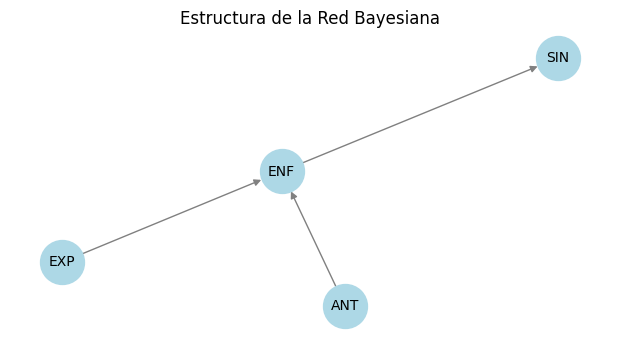

¿Modelo válido?: True

P(ENF | EXP=1, SIN=1):
 +--------+------------+
| ENF    |   phi(ENF) |
+========+============+
| ENF(0) |     0.5870 |
+--------+------------+
| ENF(1) |     0.4130 |
+--------+------------+


In [5]:
# Importar NumPy para manejo de arrays numéricos
import numpy as np
# Importar pandas para la manipulación y análisis de datos tabulares (DataFrames)
import pandas as pd
# Importamos NetworkX para la creación, manipulación y visualización de grafos o redes complejas
import networkx as nx
# Importar Matplotlib para visualizar las funciones de membresía
import matplotlib.pyplot as plt

# Importamos las librerías necesarias para trabajar con Redes Bayesianas
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# 1. Definir la estructura de la red
# ANT --> ENF <-- ENXP

modelo = DiscreteBayesianNetwork([
    ('ANT', 'ENF'),
    ('EXP', 'ENF'),
    ('ENF', 'SIN')
])

# 2. Definir las probabilidades a priori (P(ANT), P(EXP))
cpd_ant = TabularCPD('ANT', 2, [[0.7], [0.3]])  # 0 = False, 1 = True
cpd_exp = TabularCPD('EXP', 2, [[0.6], [0.4]])

# 3. Definir la tabla de probabilidad condicional de ENF (P(ENF | ENT, EXP))
cpd_enf = TabularCPD(
    variable='ENF',  # La variable de la que estamos definiendo la distribución condicional (en este caso 'ENF')
    variable_card=2,  # El número de valores posibles que puede tomar la variable 'ENF'. Como 'ENF' es binaria, tiene 2 posibles valores (0 o 1).
    values=[  # La tabla de probabilidades condicionales. Es una lista que contiene las probabilidades para 'ENF' en función de los valores de las variables 'ANT' y 'EXP'.
        [0.99, 0.9, 0.95, 0.6],   # P(ENF = 0) para diferentes combinaciones de 'ANT' y 'EXP'. [0,0][0,1][1,0][1,1]
        [0.01, 0.1, 0.05, 0.4]  # P(ENF= 1) para diferentes combinaciones de 'ANRT' y 'EXP'. [0,0][0,1][1,0][1,1]
    ],
    evidence=['ANT', 'EXP'],  # Las variables de las que depende 'ENF'. En este caso, 'ANT' y 'EXP'.
    evidence_card=[2, 2]  # El número de valores posibles para cada variable de evidencia. 'ANT' y 'EXP' son binarias, por lo que ambos tienen 2 valores posibles.
)

# 4. Definir la tabla de probabilidad condicional de SIN (P(SIN | ENF))
cpd_sin = TabularCPD(
    variable='SIN',  # La variable para la cual estamos definiendo la distribución condicional.
    variable_card=2,  # 'SIN' tiene dos posibles valores: 0 y 1.
    values=[  # La tabla de probabilidades condicionales
        [0.7, 0.1],  # P(SIN = 0) dada ENF = 0, ENF = 1
        [0.3, 0.9],  # P(SIN = 1) dada ENF = 0, ENF = 1
    ],
    evidence=['ENF'],  # La variable que condiciona la distribución de 'SIN'
    evidence_card=[2]  # 'ENF' también es binaria, por lo que tiene 2 valores posibles (0 y 1)
)

#5. Visualizar la estructura de la red
# Convertir la red bayesiana en un grafo de NetworkX
# Dibujar el grafo con NetworkX
grafo = nx.DiGraph()
grafo.add_edges_from(modelo.edges())
plt.figure(figsize=(6, 3))
nx.draw(grafo, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=10, arrows=True)
plt.title("Estructura de la Red Bayesiana")
plt.show()

# 6. Añadir las CPDs al modelo
modelo.add_cpds(cpd_ant, cpd_exp, cpd_enf, cpd_sin)

# 5. Verificar que el modelo es válido
print("¿Modelo válido?:", modelo.check_model())

# 6. Crear el motor de inferencia
infer = VariableElimination(modelo)

# 7. Consultas de inferencia

# a) P(ENF | EXP=1, SIN=1)
res_1 = infer.query(variables=['ENF'], evidence={'EXP': 1, 'SIN': 1})
print("\nP(ENF | EXP=1, SIN=1):\n", res_1)



# Conclusiones
**Justificación del resultado:**
El modelo combina toda la información disponible en la red (las tablas de probabilidad condicionales y las evidencias dadas) para actualizar la probabilidad de la variable ENF.

- EXP=1: indica que la persona estuvo expuesta, lo que incrementa la probabilidad de enfermedad.

- SIN=1: indica presencia de síntomas, lo que también apoya la hipótesis de que hay enfermedad.

- Red Bayesiana: conecta estas evidencias y propaga la información para calcular la probabilidad posterior de ENF.

**Interpretación:**

La probabilidad de tener la enfermedad (ENF=1) sube al 41% dado que hay exposición y síntomas.

Antes (sin evidencia), esta probabilidad era más baja. un 8,9%:

P(ENF=1) =
- P(ENF=1∣ANT=0,EXP=0)⋅P(ANT=0)⋅P(EXP=0)
- +P(ENF=1∣ANT=0,EXP=1)⋅P(ANT=0)⋅P(EXP=1)
- +P(ENF=1∣ANT=1,EXP=0)⋅P(ANT=1)⋅P(EXP=0)
- +P(ENF=1∣ANT=1,EXP=1)⋅P(ANT=1)⋅P(EXP=1)
- =(0.01)(0.7)(0.6)+(0.10)(0.7)(0.4)+(0.05)(0.3)(0.6)+(0.40)(0.3)(0.4)
- =0.0042+0.028+0.009+0.048
- =∗∗0.0892∗∗

El modelo está razonando correctamente: la presencia de síntomas y exposición aumentan la probabilidad de enfermedad, pero no la garantizan.

# ----------------------------------------------
# 3. Clasificadores Naive Bayes para análisis de sentimiento 

El objetivo de esta actividad es aplicar diferentes variantes de Naive Bayes para entrenar y evaluar modelos de análisis de sentimiento binario (positivo/negativo) sobre un dataset con presencia/ausencia de palabras clave.

UtilizarEMOS dos conjuntos de datos:
- uno balanceado (dataset_sentimiento_realista.csv)  
- otro desbalanceado (dataset_sentimiento_realista_desbalanceado.csv)
- Ejemplos: 1.000 reseñas simuladas 
- Variables: 50 columnas que representan la presencia (1) o ausencia (0) de palabras clave (como "bueno", "malo", "rápido", "fallo", etc.) 
- Una columna Sentimiento: 1 = positivo, 0 = negativo 

Clasificadores a considerar Existen en python cuatro tipos de Naive Bayes, cada uno pensado para unos problemas concretos:

| Clasificador           | ¿Cuando usarlo?     | Tipo de datos esperado |
|------------------------|---------------------|------------------------|
| BernoulliNB    | Presencia/ausencia (0/1), como análisis de texto binarizado o tokens | Binario (0 o 1) |
| MultinomialNB  | Conteo de eventos (frecuencia de palabras, clicks, visitas...) | Enero > 0 |
| ComplementNB   | Como Multinomial, pero mejor cuando hay clases desbalanceadas  | Enero > 0 |
| GaussianNB     | Datos continuos (mediciones, sensores, etc.)        | Reales ( float) |

### 3.1 Tareas Para el dataset balanceado primero y desbalanceado después:  

- **1. Entrena los cuatro modelos** (MultinomialNB, BernoulliNB, ComplementNB) sobre el dataset, usando train_test_split (80% entrenamiento / 20% prueba). 

- **2. Evalúa cada modelo** con: 
    - a. classification_report (precisión, recall, f1-score) 
    - b. accuracy_score 
    
- **3. Compara los resultados** entre modelos en una tabla

- **4. Haz predicciones** sobre al menos tres comentarios inventados y explica por qué crees que se clasificaron así. 

- **5. Extrae la matriz de confusión.** Es una herramienta esencial para ver si el modelo tiende a equivocarse más con positivos o negativos, algo esencial en datasets desbalanceados. 



📊 Analizando dataset: Balanceado🔍 Entrenando BernoulliNB
📈 Accuracy: 0.95

📋 Métricas por clase sentimiento:
Sentimiento: 0
  - Precision: 0.96
  - Recall:    0.941
  - F1-score:  0.95
Sentimiento: 1
  - Precision: 0.941
  - Recall:    0.96
  - F1-score:  0.95


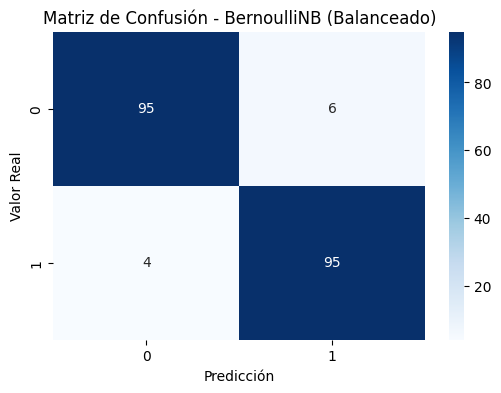


🧪 Predicciones con Balanceado (BernoulliNB)
Comentario 1: Positivo - Entrada: {'Bueno': 1, 'Fantástico': 1, 'Satisfacción': 1, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 2: Negativo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 1, 'Encanta': 1, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 3: Negativo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 1, 'Pérdida': 1, 'Horrible': 1, 'Inútil': 0, 'Terrible': 0}

📊 Analizando dataset: Balanceado🔍 Entrenando MultinomialNB
📈 Accuracy: 0.955

📋 Métricas por clase sentimiento:
Sentimiento: 0
  - Precision: 0.969
  - Recall:    0.941
  - F1-score:  0.955
Sentimiento: 1
  - Precision: 0.941
  - Recall:    0.97
  - F1-score:  0.955


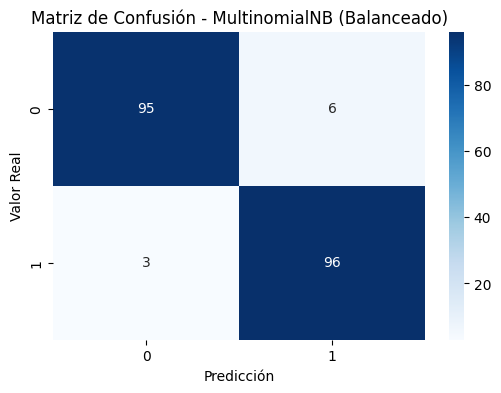


🧪 Predicciones con Balanceado (MultinomialNB)
Comentario 1: Positivo - Entrada: {'Bueno': 1, 'Fantástico': 1, 'Satisfacción': 1, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 2: Positivo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 1, 'Encanta': 1, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 3: Negativo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 1, 'Pérdida': 1, 'Horrible': 1, 'Inútil': 0, 'Terrible': 0}

📊 Analizando dataset: Balanceado🔍 Entrenando ComplementNB
📈 Accuracy: 0.955

📋 Métricas por clase sentimiento:
Sentimiento: 0
  - Precision: 0.969
  - Recall:    0.941
  - F1-score:  0.955
Sentimiento: 1
  - Precision: 0.941
  - Recall:    0.97
  - F1-score:  0.955


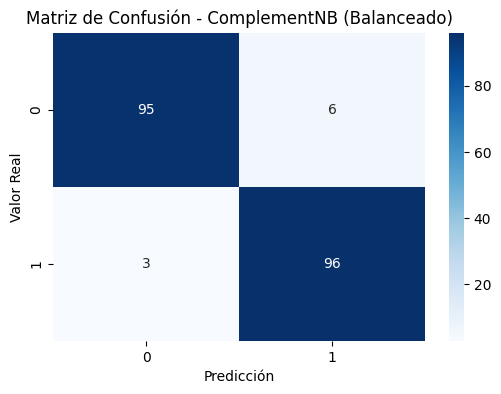


🧪 Predicciones con Balanceado (ComplementNB)
Comentario 1: Positivo - Entrada: {'Bueno': 1, 'Fantástico': 1, 'Satisfacción': 1, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 2: Positivo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 1, 'Encanta': 1, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 3: Negativo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 1, 'Pérdida': 1, 'Horrible': 1, 'Inútil': 0, 'Terrible': 0}

📊 Analizando dataset: Balanceado🔍 Entrenando GaussianNB
📈 Accuracy: 0.95

📋 Métricas por clase sentimiento:
Sentimiento: 0
  - Precision: 0.96
  - Recall:    0.941
  - F1-score:  0.95
Sentimiento: 1
  - Precision: 0.941
  - Recall:    0.96
  - F1-score:  0.95


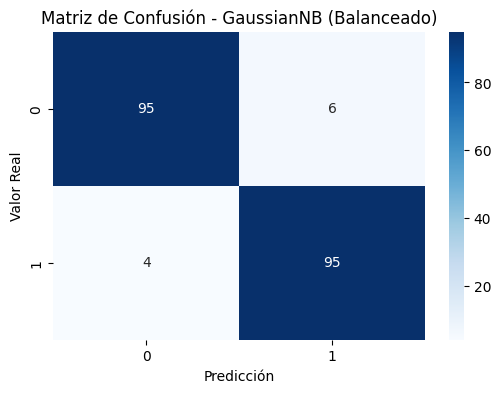


🧪 Predicciones con Balanceado (GaussianNB)
Comentario 1: Positivo - Entrada: {'Bueno': 1, 'Fantástico': 1, 'Satisfacción': 1, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 2: Negativo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 1, 'Encanta': 1, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 3: Negativo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 1, 'Pérdida': 1, 'Horrible': 1, 'Inútil': 0, 'Terrible': 0}

📌 Comparación general de modelos Balanceado:


,Modelo,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
0,BernoulliNB,0.950,0.960,0.941,0.950,0.941,0.96,0.950
1,MultinomialNB,0.955,0.969,0.941,0.955,0.941,0.97,0.955
2,ComplementNB,0.955,0.969,0.941,0.955,0.941,0.97,0.955
3,GaussianNB,0.950,0.960,0.941,0.950,0.941,0.96,0.950



📊 Analizando dataset: Desbalanceado🔍 Entrenando BernoulliNB
📈 Accuracy: 0.94

📋 Métricas por clase sentimiento:
Sentimiento: 0
  - Precision: 0.968
  - Recall:    0.955
  - F1-score:  0.962
Sentimiento: 1
  - Precision: 0.844
  - Recall:    0.884
  - F1-score:  0.864


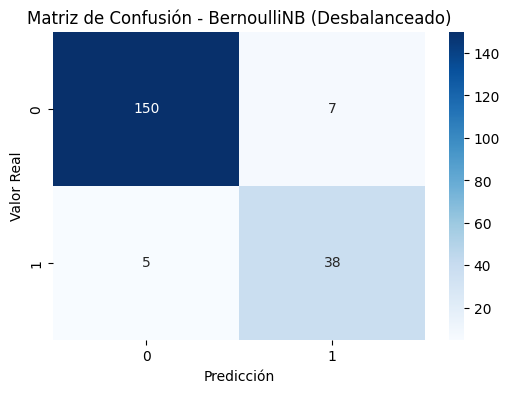


🧪 Predicciones con Desbalanceado (BernoulliNB)
Comentario 1: Negativo - Entrada: {'Bueno': 1, 'Fantástico': 1, 'Satisfacción': 1, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 2: Negativo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 1, 'Encanta': 1, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 3: Negativo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 1, 'Pérdida': 1, 'Horrible': 1, 'Inútil': 0, 'Terrible': 0}

📊 Analizando dataset: Desbalanceado🔍 Entrenando MultinomialNB
📈 Accuracy: 0.935

📋 Métricas por clase sentimiento:
Sentimiento: 0
  - Precision: 0.944
  - Recall:    0.975
  - F1-score:  0.959
Sentimiento: 1
  - Precision: 0.895
  - Recall:    0.791
  - F1-score:  0.84


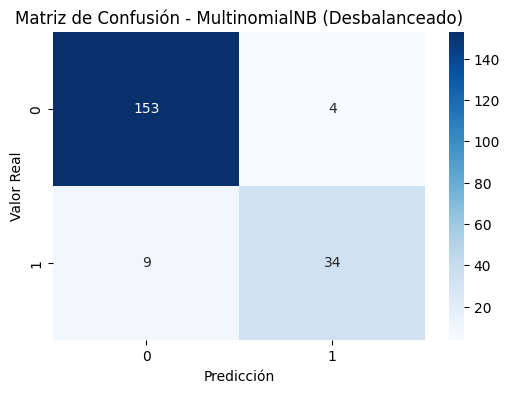


🧪 Predicciones con Desbalanceado (MultinomialNB)
Comentario 1: Positivo - Entrada: {'Bueno': 1, 'Fantástico': 1, 'Satisfacción': 1, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 2: Positivo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 1, 'Encanta': 1, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 3: Negativo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 1, 'Pérdida': 1, 'Horrible': 1, 'Inútil': 0, 'Terrible': 0}

📊 Analizando dataset: Desbalanceado🔍 Entrenando ComplementNB
📈 Accuracy: 0.95

📋 Métricas por clase sentimiento:
Sentimiento: 0
  - Precision: 0.987
  - Recall:    0.949
  - F1-score:  0.968
Sentimiento: 1
  - Precision: 0.837
  - Recall:    0.953
  - F1-score:  0.891


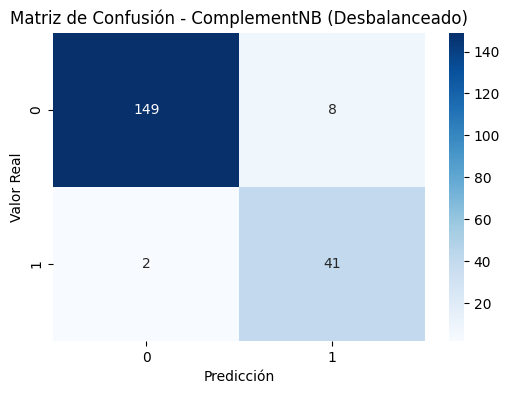


🧪 Predicciones con Desbalanceado (ComplementNB)
Comentario 1: Positivo - Entrada: {'Bueno': 1, 'Fantástico': 1, 'Satisfacción': 1, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 2: Positivo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 1, 'Encanta': 1, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 3: Negativo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 1, 'Pérdida': 1, 'Horrible': 1, 'Inútil': 0, 'Terrible': 0}

📊 Analizando dataset: Desbalanceado🔍 Entrenando GaussianNB
📈 Accuracy: 0.94

📋 Métricas por clase sentimiento:
Sentimiento: 0
  - Precision: 0.968
  - Recall:    0.955
  - F1-score:  0.962
Sentimiento: 1
  - Precision: 0.844
  - Recall:    0.884
  - F1-score:  0.864


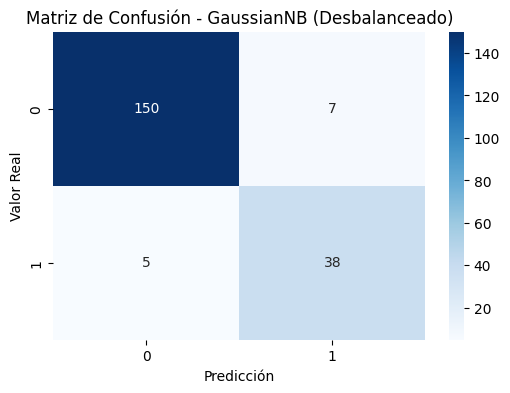


🧪 Predicciones con Desbalanceado (GaussianNB)
Comentario 1: Negativo - Entrada: {'Bueno': 1, 'Fantástico': 1, 'Satisfacción': 1, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 2: Negativo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 1, 'Encanta': 1, 'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0}
Comentario 3: Negativo - Entrada: {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 0, 'Encanta': 0, 'Pésimo': 1, 'Pérdida': 1, 'Horrible': 1, 'Inútil': 0, 'Terrible': 0}

📌 Comparación general de modelos Desbalanceado:


,Modelo,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
0,BernoulliNB,0.940,0.968,0.955,0.962,0.844,0.884,0.864
1,MultinomialNB,0.935,0.944,0.975,0.959,0.895,0.791,0.840
2,ComplementNB,0.950,0.987,0.949,0.968,0.837,0.953,0.891
3,GaussianNB,0.940,0.968,0.955,0.962,0.844,0.884,0.864


In [7]:
# Análisis de sentimiento binario con variantes de Naive Bayes
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Cargar datasets 
datasets = {
    'Balanceado': pd.read_csv('./data/dataset_sentimiento_realista.csv'),
    'Desbalanceado': pd.read_csv('./data/dataset_sentimiento_realista_desbalanceado.csv')
}

# Modelos a evaluar
modelos = {
    'BernoulliNB': BernoulliNB(),
    'MultinomialNB': MultinomialNB(),
    'ComplementNB': ComplementNB(),
    'GaussianNB': GaussianNB()
}

# --- Comentarios personalizados para prueba ---
comentarios = pd.DataFrame([
    # Comentario 1 - Positivo
    {'Bueno': 1, 'Fantástico': 1, 'Satisfacción': 1, 'Perfecto': 0, 'Encanta': 0,
     'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0},
    
    # Comentario 2 - Positivo
    {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 1, 'Encanta': 1,
     'Pésimo': 0, 'Pérdida': 0, 'Horrible': 0, 'Inútil': 0, 'Terrible': 0},
    
    # Comentario 3 - Negativo
    {'Bueno': 0, 'Fantástico': 0, 'Satisfacción': 0, 'Perfecto': 0, 'Encanta': 0,
     'Pésimo': 1, 'Pérdida': 1, 'Horrible': 1, 'Inútil': 0, 'Terrible': 0}
])



for nombre_dataset, df in datasets.items():
        
    # Almacenar resultados
    resultados = []
    res_precision = []
    res_recall = []
    res_f1 = []
    
    # Rellenar columnas faltantes con ceros (suponiendo 50 columnas)
    columnas_data = df.drop(columns='Sentimiento').columns
    ejemplos = comentarios.reindex(columns=columnas_data, fill_value=0)
    
    # Seleccionar características (X) y etiqueta (y)
    X = df.drop(columns=['Sentimiento'])
    y = df['Sentimiento']
       
    for nombre_modelo, modelo in modelos.items():
        
        #Dividir en entrenamiento y test (80% / 20%)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # Crear y entrenar los modelos
        modelo.fit(X_train, y_train)

        #Predecir en el conjunto de test
        y_pred = modelo.predict(X_test)

        #Evaluar el modelo
        accuracy = round(accuracy_score(y_test, y_pred), 3)

        # Precisión, recall y F1 por clase
        precision = precision_score(y_test, y_pred, average=None, labels=modelo.classes_)
        recall = recall_score(y_test, y_pred, average=None, labels=modelo.classes_)
        f1 = f1_score(y_test, y_pred, average=None, labels=modelo.classes_)

        # Imprimir métricas por clase
        print(f"\n📊 Analizando dataset: {nombre_dataset}🔍 Entrenando {nombre_modelo}")
        print("📈 Accuracy:", accuracy)
        print("\n📋 Métricas por clase sentimiento:")
        res_precision = []
        res_recall = []
        res_f1 = []
        for i, clase in enumerate(modelo.classes_):
            print(f"Sentimiento: {clase}")
            print(f"  - Precision: {round(precision[i], 3)}")
            print(f"  - Recall:    {round(recall[i], 3)}")
            print(f"  - F1-score:  {round(f1[i], 3)}")
            res_precision.append(round(precision[i], 3))
            res_recall.append(round(recall[i], 3))
            res_f1.append(round(f1[i], 3))
          
        resultados.append({

            'Modelo': nombre_modelo,
            'Accuracy': accuracy,
            'Precision_0': res_precision[0],
            'Recall_0': res_recall[0],
            'F1_0': res_f1[0],
            'Precision_1': res_precision[1],
            'Recall_1': res_recall[1],
            'F1_1': res_f1[1],
        })
        # 6. Matriz de confusión
        matriz = confusion_matrix(y_test, y_pred, labels= modelo.classes_)
        # 7. Mostrar matriz de confusión
        plt.figure(figsize=(6, 4))
        sns.heatmap(matriz, annot=True, fmt='d', cmap="Blues",
            xticklabels=modelo.classes_, yticklabels= modelo.classes_)
        plt.xlabel("Predicción")
        plt.ylabel("Valor Real")
        plt.title(f'Matriz de Confusión - {nombre_modelo} ({nombre_dataset})')
        plt.show()
        
        # --- Predicción sobre ejemplos personalizados ---

        print(f"\n🧪 Predicciones con {nombre_dataset} ({nombre_modelo})")
        modelo.fit(X_train, y_train)
        predicciones = modelo.predict(ejemplos)
    
        for i, p in enumerate(predicciones):
            print(f"Comentario {i+1}: {'Positivo' if p == 1 else 'Negativo'} - Entrada: {comentarios.iloc[i].to_dict()}")
        
    # Mostrar resumen comparativo
    df_resultados = pd.DataFrame(resultados)
    print(f"\n📌 Comparación general de modelos {nombre_dataset}:")
    display(df_resultados.round(3))




# Conclusiones dataset balanceado

**Modelo más preciso:** **MultinomialNB** y **ComplementNB** demostraron ser los más precisos, con un buen desempeño en la clasificación, mientras que **BernoulliNB** y **GaussianNB** cometieron errores. Si el dataset sigue balanceado, estas dos variantes podrían ser las mejores opciones.

**Desempeño de GaussianNB**: **GaussianNB** no funcionó bien en este caso debido a que las características binarias no siguen distribuciones gaussianas, por lo que debería descartarse para este tipo de problema.

**Errores en BernoulliNB:** El error de BernoulliNB en el Comentario 2 indica que, aunque es adecuado para características binarias, puede no ser efectivo si las relaciones entre palabras y sentimientos son complejas, lo que podría mejorar con ajustes en los hiperparámetros o más datos.

# Conclusiones dataset desbalanceado 

**Modelo Más preciso:** **MultinomialNB** y **ComplementNB** fueron los modelos más efectivos, prediciendo correctamente los comentarios positivos y negativos. En cambio, **GaussianNB** y **BernoulliNB** tuvieron dificultades debido al desbalanceo de clases, especialmente con los comentarios positivos.

**Desbalanceo en el Dataset:** El desbalanceo afectó negativamente a **BernoulliNB** y **GaussianNB**, que tendieron a predecir la clase mayoritaria (negativa). Este es un comportamiento común cuando los modelos no manejan explícitamente clases desbalanceadas.
